# Data visualisation task 

**Additional information**  
[Cars93 metadata](https://jse.amstat.org/v1n1/datasets.lock.html) 

In [26]:
# Import libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [27]:
# Load data
car_data = pd.read_csv('Cars93.csv', index_col = 0, keep_default_na=False) 

In [28]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 1 to 93
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.capac

### 1. Boxplot

<Axes: title={'center': 'Compare revs per mile for the Audi, Hyundai, Suzuki, and Toyota car manufacturers'}, xlabel='Manufacturer', ylabel='Rev.per.mile'>

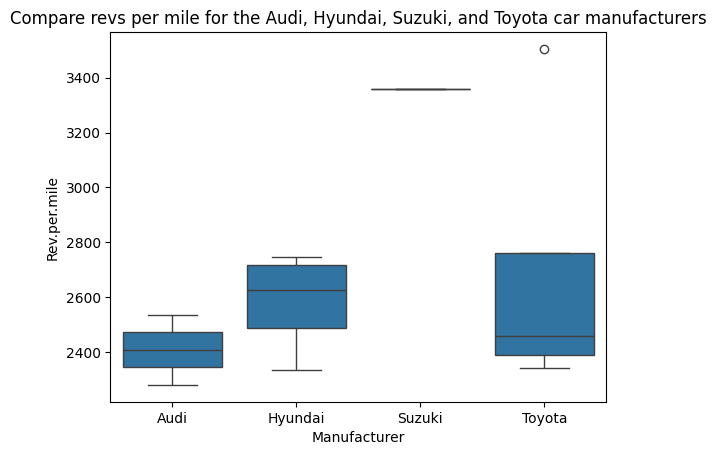

In [29]:
# Boxplot for revs per mile

#print(car_data.Manufacturer.unique())

# Filter out the wanted scope
df_brands = car_data[car_data.Manufacturer.isin(['Audi', 'Hyundai', 'Suzuki', 'Toyota'])][['Manufacturer','Rev.per.mile']]
#print(df_brands[df_brands.Manufacturer == 'Toyota'].head(50))
#plt.xticks(rotation=90)
plt.title('Compare revs per mile for the Audi, Hyundai, Suzuki, and Toyota car manufacturers')
sns.boxplot(df_brands, x='Manufacturer', y='Rev.per.mile')


**Boxplot question:**  
Which of these manufacturers has the car with the highest revs per mile?


**Boxplot answer: Toyota, because Toyota got a model with highest revs per mile**


### 2. Histogram

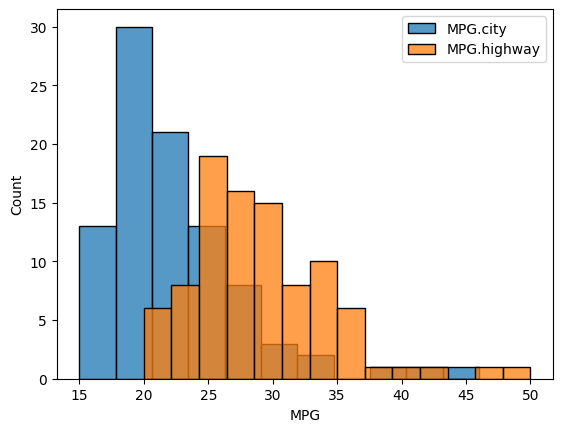

In [30]:
# Histogram of MPG
sns.histplot(car_data, x='MPG.city', label="MPG.city")
sns.histplot(car_data, x='MPG.highway', label="MPG.highway")
plt.xlabel("MPG")
plt.legend()

# dta = car_data[['Model', 'MPG.city', 'MPG.highway']]
# sns.histplot(dta)

**Histogram question:**  
Is it generally more fuel efficient to drive in the city or on the highway?

**Histogram answer: It is generally more fuel efficient to drive on the highway, as MPG.Highway has more counts with higher MPG value.**

### 3. Lineplot

<Axes: xlabel='Wheelbase', ylabel='Turn.circle'>

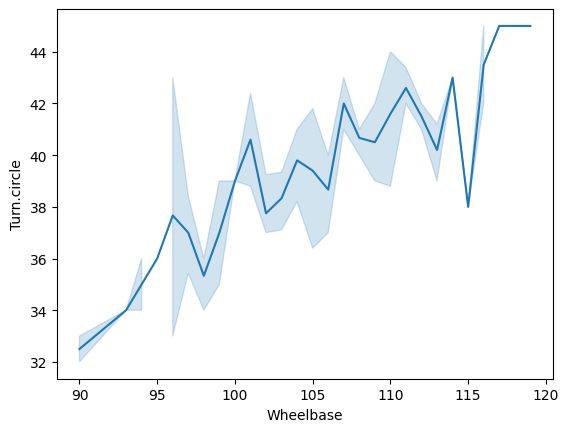

In [31]:
# Lineplot (Wheelbase vs turning circle)
sns.lineplot(car_data, x='Wheelbase', y='Turn.circle')

**Lineplot question:**  
What is this relationship? What happens when the wheelbase gets larger?


**Lineplot answer: Turning circle gets larger when the wheelbase gets larger.**  


### 4. Barplot

Text(0, 0.5, 'Average Horsepower')

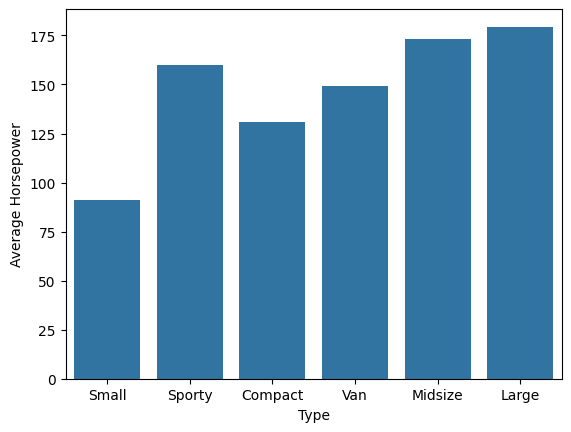

In [32]:
# Barplot for mean horsepower

# Calculate size of car for compare sizes between car types
car_data['Size'] = car_data['Width'] * car_data['Length']
df_mean_horsepower = car_data.groupby('Type').agg({'Horsepower': 'mean', 'Size': 'mean'}).reset_index()

# Plot the barplot
sns.barplot(df_mean_horsepower, x='Type', y='Horsepower', order=df_mean_horsepower.sort_values('Size')['Type'])
plt.ylabel('Average Horsepower')

**Barplot question:**  
Does a larger car mean more horsepower?



**Barplot answer: No, it is not. Sporty car is not large, but it has large average horsepower.**